In [1]:
import pickle
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], ".."))
from modt.modt import MoDT
from modt._initialization import *
from modt.visualization import *
from modt.utility import *

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR

In [2]:
data_input = pickle.load(open("../datasets/generated7_input.np", "rb"))
data_target = pickle.load(open("../datasets/generated7_target.np", "rb"))
#data_input = pickle.load(open("../datasets/banknote_input.pd", "rb"))
#data_target = pickle.load(open("../datasets/banknote_target.pd", "rb"))
parameters = {
    "X": data_input,
    "y": data_target,
    "n_experts": 3,
    "iterations": 100,
    "max_depth": 1,
    "init_learning_rate": 100,
    "learning_rate_decay": 0.995,
    "initialization_method": "random",
    "feature_names": None,
    "class_names": None,
    "use_2_dim_gate_based_on": "feature_importance",
    "use_2_dim_clustering": False,
    "black_box_algorithm": None,
    "save_likelihood": True,
    }

parameters_fit = {
    "optimization_method": "ridge_regression",
    "early_stopping": False,
    "use_posterior": False,
    }

modt = MoDT(**parameters)
modt.fit(**parameters_fit)

Min:  0.6272 Max:  0.9196


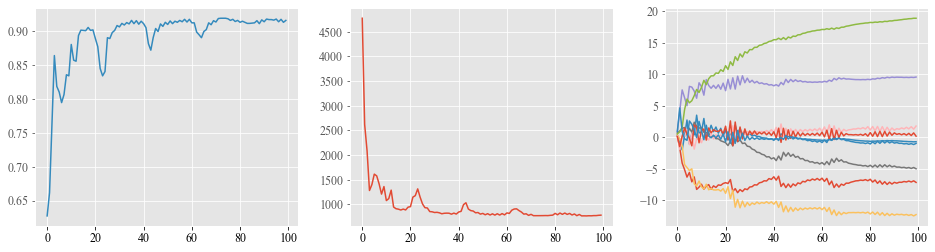

In [3]:
fig = plt.gcf()
fig.set_size_inches(16, 4)
plot_training(modt)

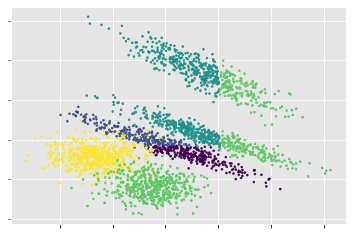

In [4]:
plot_initialization(modt, true_labels=True)

In [5]:
SAVE_OUTPUTS = False
if SAVE_OUTPUTS:
    POINT_SIZE = 1
else:
    POINT_SIZE = 4

In [6]:
THETA_FITTING_METHOD = "lda" # "lr" or "lda"

## Random

Iteration 0 training accuracy 0.6272
Final training accuracy 0.9196


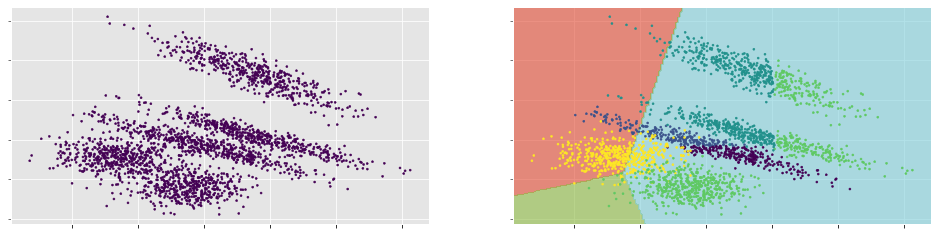

In [7]:
fig = plt.gcf()
fig.set_size_inches(5.8, 1.2) if SAVE_OUTPUTS else fig.set_size_inches(16.5, 4)
plot_initialization_gates(modt, point_size=POINT_SIZE)
print("Iteration 0 training accuracy", modt.score_internal(0))
print("Final training accuracy", modt.score_internal(modt.best_iteration))
if SAVE_OUTPUTS:
    plt.savefig("output/initialization_random.pdf", bbox_inches="tight")

## k-means

Iteration 0 training accuracy 0.7808
Final training accuracy 0.96


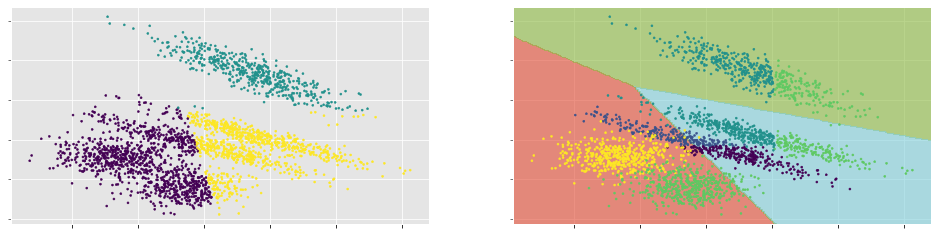

In [8]:
parameters["initialization_method"] = Kmeans_init(theta_fittig_method=THETA_FITTING_METHOD)
modt = MoDT(**parameters)
modt.fit(**parameters_fit)

fig = plt.gcf()
fig.set_size_inches(5.8, 1.2) if SAVE_OUTPUTS else fig.set_size_inches(16.5, 4)
plot_initialization_gates(modt, point_size=POINT_SIZE)
print("Iteration 0 training accuracy", modt.score_internal(0))
print("Final training accuracy", modt.score_internal(modt.best_iteration))
if SAVE_OUTPUTS:
    plt.savefig("output/initialization_kmeans.pdf", bbox_inches="tight")

## k-DT-means

Iteration 0 training accuracy 0.8828
Final training accuracy 0.96


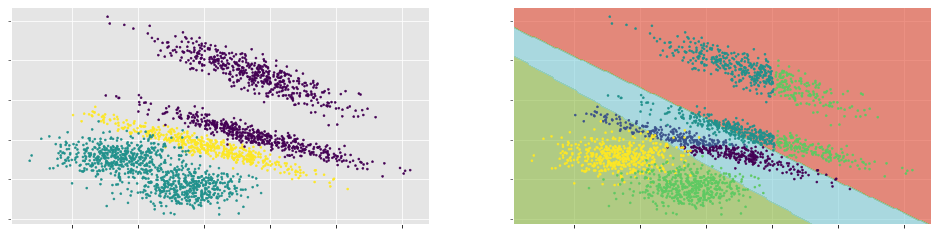

In [9]:
parameters["initialization_method"] = KDTmeans_init(alpha=6, beta=0.001, theta_fittig_method=THETA_FITTING_METHOD)
modt = MoDT(**parameters)
modt.fit(**parameters_fit)

fig = plt.gcf()
fig.set_size_inches(5.8, 1.2) if SAVE_OUTPUTS else fig.set_size_inches(16.5, 4)
plot_initialization_gates(modt, point_size=POINT_SIZE)
print("Iteration 0 training accuracy", modt.score_internal(0))
print("Final training accuracy", modt.score_internal(modt.best_iteration))
if SAVE_OUTPUTS:
    plt.savefig("output/initialization_kDTmeans.pdf", bbox_inches="tight")

## Final solution of k-DT-means

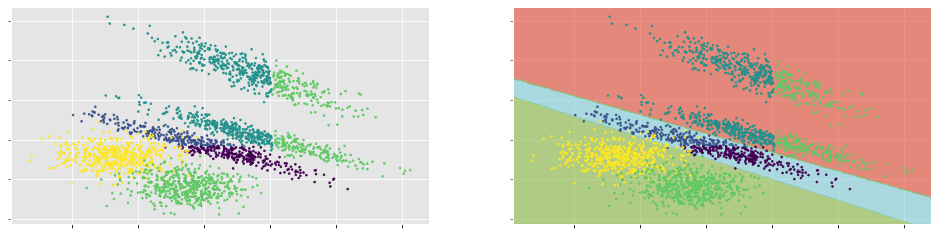

In [10]:
fig = plt.gcf()
fig.set_size_inches(5.8, 1.2) if SAVE_OUTPUTS else fig.set_size_inches(16.5, 4)
plt.subplot(1, 2, 1)
plot_initialization(modt, point_size=POINT_SIZE, true_labels=True)
plt.subplot(1, 2, 2)
plot_gating(modt, point_size=POINT_SIZE, iteration=modt.best_iteration,title=False,axis_digits=False,inverse_transform_standardization=False)
if SAVE_OUTPUTS:
    plt.savefig("output/initialization_good_solution.pdf", bbox_inches="tight")

## BGM

Iteration 0 training accuracy 0.7704
Final training accuracy 0.96


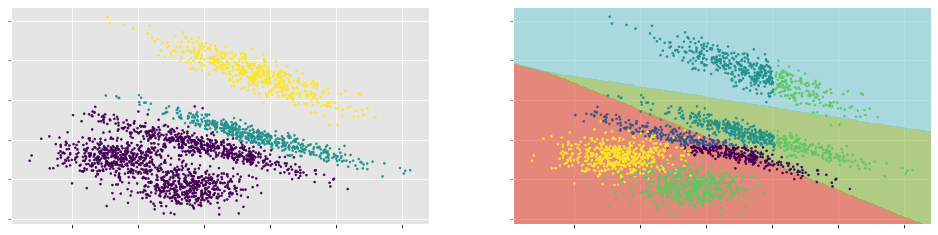

In [11]:
parameters["initialization_method"] = BGM_init(theta_fittig_method=THETA_FITTING_METHOD)
modt = MoDT(**parameters)
modt.fit(**parameters_fit)

fig = plt.gcf()
fig.set_size_inches(5.8, 1.2) if SAVE_OUTPUTS else fig.set_size_inches(16.5, 4)
plot_initialization_gates(modt, point_size=POINT_SIZE)
print("Iteration 0 training accuracy", modt.score_internal(0))
print("Final training accuracy", modt.score_internal(modt.best_iteration))
if SAVE_OUTPUTS:
    plt.savefig("output/initialization_BGM.pdf", bbox_inches="tight")

## Boosting

Iteration 0 training accuracy 0.57
Final training accuracy 0.9184


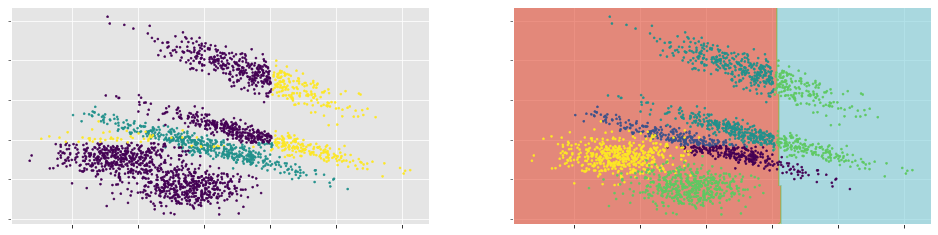

In [12]:
parameters["initialization_method"] = Boosting_init(theta_fittig_method=THETA_FITTING_METHOD)
modt = MoDT(**parameters)
modt.fit(**parameters_fit)

fig = plt.gcf()
fig.set_size_inches(5.8, 1.2) if SAVE_OUTPUTS else fig.set_size_inches(16.5, 4)
plot_initialization_gates(modt, point_size=POINT_SIZE)
print("Iteration 0 training accuracy", modt.score_internal(0))
print("Final training accuracy", modt.score_internal(modt.best_iteration))
if SAVE_OUTPUTS:
    plt.savefig("output/initialization_Boosting.pdf", bbox_inches="tight")